#                                              Olympic Medals

The Olympic medal data comprises records of all events held at the Olympic games between 1896 and 2008.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
medals = pd.read_csv('all_medalists.csv')
medals.head(15)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHAZAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


# Grouping and aggregating

Find the total number of medals awarded to the GRE per edition.

In [94]:
GRE_edition_grouped = medals.loc[medals.NOC=='GRE'].groupby('Edition')
GRE_edition_grouped['Medal'].count()

Edition
1896    52
1904     2
1908     3
1912     2
1920     5
1956     1
1960     3
1968     1
1972     2
1980     5
1984     2
1988     1
1992     2
1996     8
2000    18
2004    31
2008     7
Name: Medal, dtype: int64

# Using .value_counts() for ranking

Top 15 countries ranked by total number of medals.

In [95]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


# Using .pivot_table() to count medals by type

Use a pivot table to compute how many separate bronze, silver and gold medals each country won. You will use .pivot_table() first to aggregate the total medals by type. Then, you can use .sum() along the columns of the pivot table to produce a new column. 

In [96]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC',columns= 'Medal',values='Athlete',aggfunc= 'count')

In [97]:
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [98]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis = 'columns')

In [99]:
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [100]:
# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

In [101]:
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


In [102]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


# - - - - - - - - Understanding the column labels - - - - - - - - 




# Applying .drop_duplicates()

What could be the difference between the 'Event_gender' and 'Gender' columns? 
The duplicates can be dropped using the .drop_duplicates() method, leaving behind the unique observations. 

In [103]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


# Finding possible errors with .groupby()
You will now use .groupby() to continue your exploration. Your job is to group by 'Event_gender' and 'Gender' and count the rows.
You will see that there is only one suspicious row: This is likely a data error.

In [104]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


# Locating suspicious data.

You will now inspect the suspect record by locating the offending row.
You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [105]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[(medals.Event_gender == 'W') & (medals.Gender == 'Men')]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


# - - - - - - - - Constructing alternative country rankings - - - - - - - -




# Using .nunique() to rank by distinct sports

Which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories.

In [106]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending = False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


Interestingly, the USSR is not in the top 5 in this category, while the USA continues to remain on top. What could be the cause of this?

# Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years

In [107]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition']<= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [108]:
cold_war_medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
8019,Helsinki,1952,Aquatics,Diving,"LEE, Samuel",USA,Men,10m platform,M,Gold
8021,Helsinki,1952,Aquatics,Diving,"STOVER-IRWIN, Juno Roslays",USA,Women,10m platform,W,Bronze
8022,Helsinki,1952,Aquatics,Diving,"MCCORMICK, Patricia",USA,Women,10m platform,W,Gold
8023,Helsinki,1952,Aquatics,Diving,"MYERS-POPE, Paula Jean",USA,Women,10m platform,W,Silver
8024,Helsinki,1952,Aquatics,Diving,"CLOTWORTHY, Robert Lynn",USA,Men,3m springboard,M,Bronze


In [109]:
cold_war_medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
19583,Seoul,1988,Wrestling,Wrestling Gre-R,"DJULFALAKIAN, Levon",URS,Men,62 - 68kg (lightweight),M,Gold
19587,Seoul,1988,Wrestling,Wrestling Gre-R,"TURLYKHANOV, Daulet",URS,Men,68 - 74kg (welterweight),M,Silver
19589,Seoul,1988,Wrestling,Wrestling Gre-R,"MAMIASHVILI, Mikhail",URS,Men,74 - 82kg (middleweight),M,Gold
19591,Seoul,1988,Wrestling,Wrestling Gre-R,"POPOV, Vladimir",URS,Men,82 - 90kg (light-heavyweight),M,Bronze
19594,Seoul,1988,Wrestling,Wrestling Gre-R,"KOSLOWSKI, Dennis Marvin",USA,Men,90 - 100kg (heavyweight),M,Bronze


In [110]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending = False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


As you can see, the USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!

# Counting USA vs. USSR Cold War Olympic Medals

Which country, the USA or the USSR, won the most medals consistently over the Cold War period.

In [111]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index= 'Edition',columns='NOC',values= 'Athlete',aggfunc='count')

In [112]:
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc['1952':'1988', ['USA','URS']]

In [114]:
cold_war_usa_urs_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [115]:
# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis ='columns')

In [116]:
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [117]:
most_medals.value_counts()

URS    8
USA    2
dtype: int64

The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988.

# - - - - - - - - Reshaping DataFrames for visualization - - - - - - - -




# Visualizing USA Medal Counts by Edition: Line Plot

Visualize the medal counts by 'Edition' for the USA.

In [129]:
# Create the DataFrame: usa
usa = medals.loc[medals.NOC=='USA']

In [130]:
usa.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


In [131]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()

In [132]:
usa_medals_by_year

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
         Gold       34
         Silver     14
1912     Bronze     31
         Gold       45
         Silver     25
1920     Bronze     38
         Gold      110
         Silver     45
1924     Bronze     51
         Gold      110
         Silver     37
1928     Bronze     17
         Gold       43
         Silver     24
1932     Bronze     59
         Gold       78
         Silver     44
1936     Bronze     15
         Gold       51
         Silver     26
                  ... 
1968     Bronze     35
         Gold       83
         Silver     31
1972     Bronze     43
         Gold       53
         Silver     59
1976     Bronze     36
         Gold       63
         Silver     56
1984     Bronze     50
         Gold      168
         Silver   

In [133]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level= 'Medal')

In [134]:
usa_medals_by_year

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25
1920,38,110,45
1924,51,110,37
1928,17,43,24
1932,59,78,44


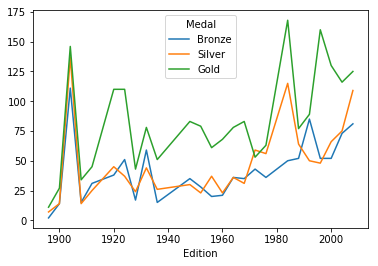

In [144]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

# Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

Bronze < Silver < Gold

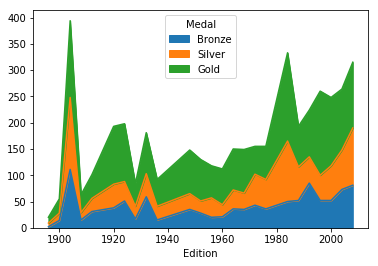

In [142]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories= ['Bronze','Silver','Gold'],ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()